In [14]:
 pip install opencv-python matplotlib numpy

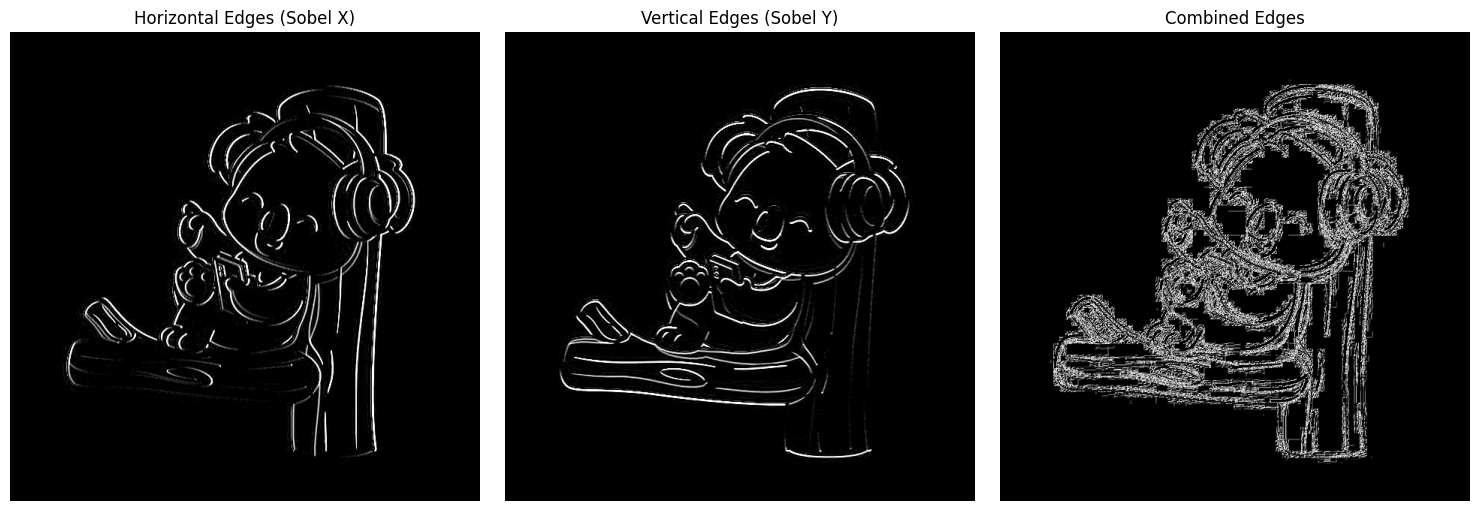

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
img = cv2.imread('cutie_koala.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Defining Sobel Kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# Applying convolution using cv2.filter2D
edge_x = cv2.filter2D(gray, -1, sobel_x)
edge_y = cv2.filter2D(gray, -1, sobel_y)

# Combining the two edges using magnitude
edges_combined = np.sqrt(np.square(edge_x) + np.square(edge_y))
edges_combined = np.uint8(np.clip(edges_combined, 0, 255))

# Displaying the results
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title('Horizontal Edges (Sobel X)')
plt.imshow(edge_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Vertical Edges (Sobel Y)')
plt.imshow(edge_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Combined Edges')
plt.imshow(edges_combined, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


The combined edges image is a bit too noisy. Ideally, combining Sobel X and Y should emphasize all edge boundaries while suppressing minor noise but the current combination seems to amplify a lot of high-frequency pixel changes. Therefore, we apply Gaussian blur before applying Sobel.


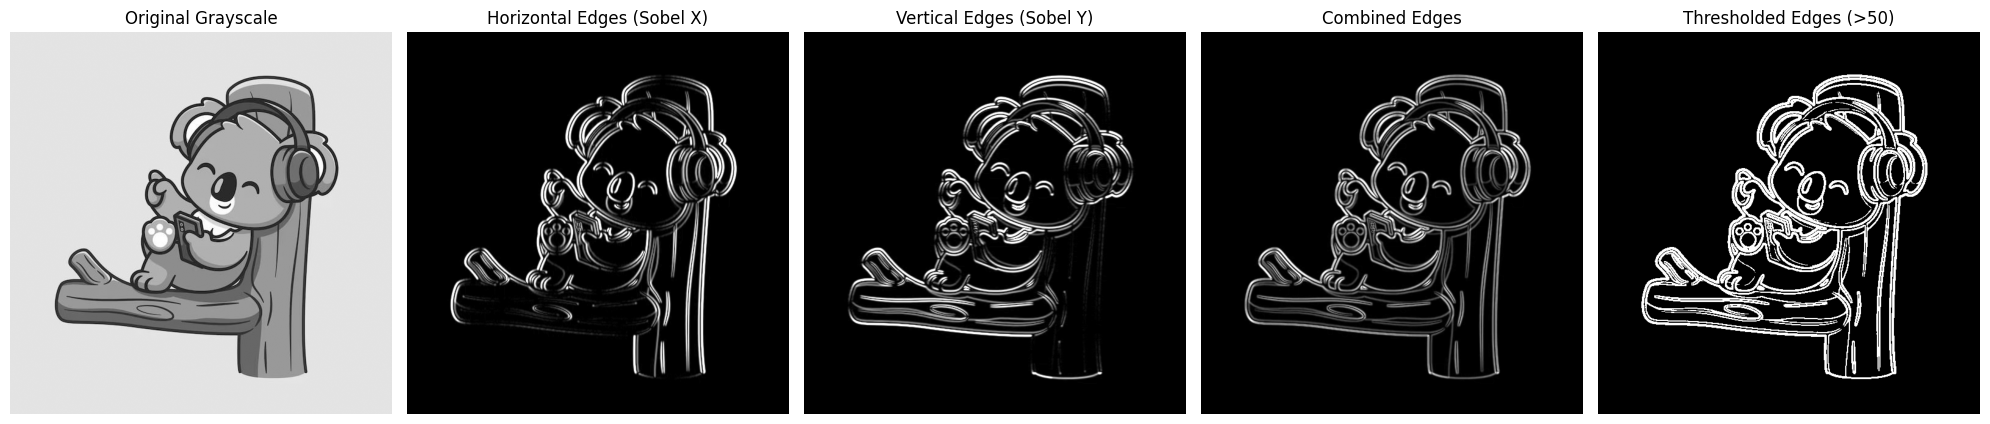

In [17]:
# Loading the image
for fn in uploaded.keys():
    img = cv2.imread(fn)

# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Applying Sobel operator in X direction
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)

# Applying Sobel operator in Y direction
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)

# Combining the two Sobel images using weighted addition
combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# 🔥 Applying Thresholding on the Combined Edges
threshold_value = 50  # You can experiment with this value!
_, thresholded = cv2.threshold(combined, threshold_value, 255, cv2.THRESH_BINARY)

# Plotting the results
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(sobelx, cmap='gray')
plt.title('Horizontal Edges (Sobel X)')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(sobely, cmap='gray')
plt.title('Vertical Edges (Sobel Y)')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(combined, cmap='gray')
plt.title('Combined Edges')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(thresholded, cmap='gray')
plt.title(f'Thresholded Edges (>{threshold_value})')
plt.axis('off')

plt.tight_layout()
plt.show()

### Scharr Edge Detection

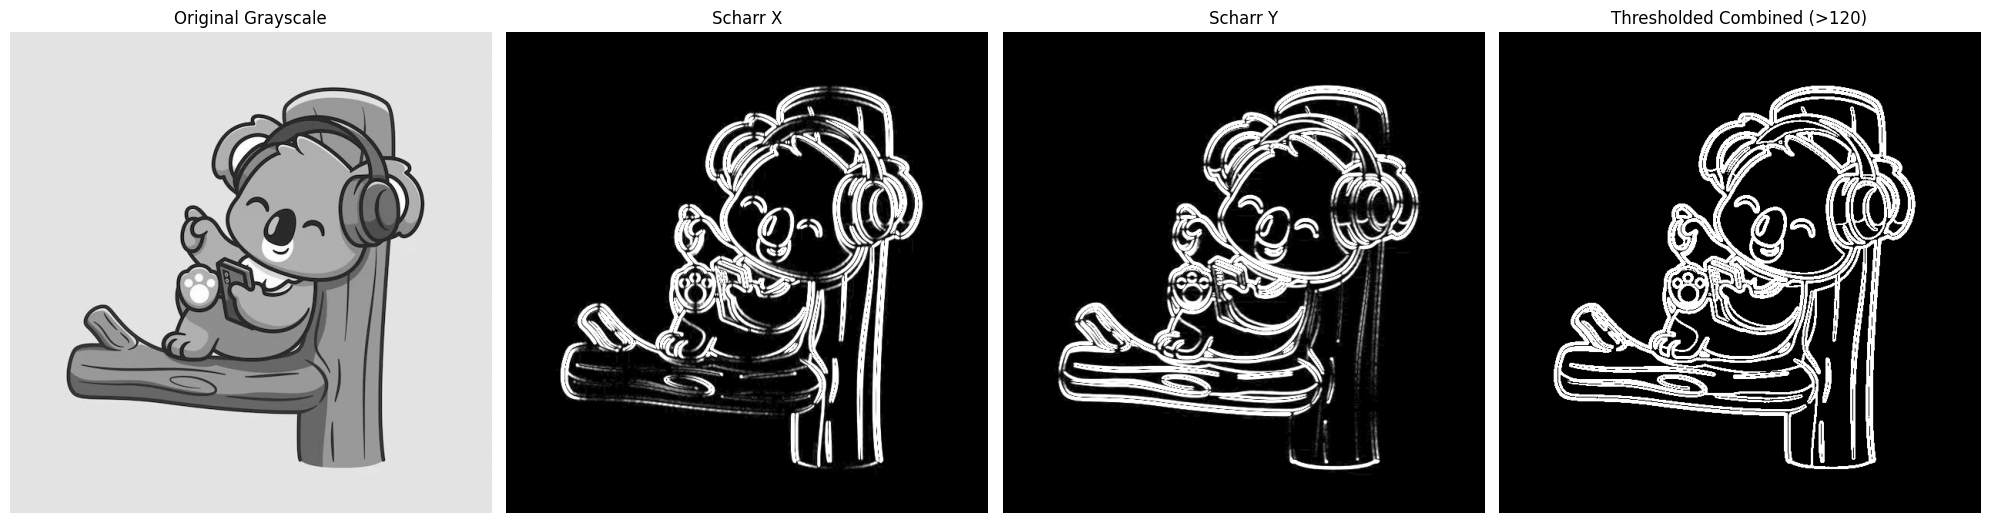

In [18]:
scharr_kernel_x = np.array([[-3, 0, 3],
                            [-10, 0, 10],
                            [-3, 0, 3]], dtype=np.float32)

scharr_kernel_y = np.array([[-3, -10, -3],
                            [ 0,   0,  0],
                            [ 3,  10,  3]], dtype=np.float32)

# Applying Scharr operator in X direction
scharrx = cv2.Scharr(blurred, cv2.CV_64F, 1, 0)
scharrx = cv2.convertScaleAbs(scharrx)

# Applying Scharr operator in Y direction
scharry = cv2.Scharr(blurred, cv2.CV_64F, 0, 1)
scharry = cv2.convertScaleAbs(scharry)

# Combining X and Y edge images
combined_scharr = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

# Setting threshold value here
threshold_value = 120

# Applying threshold to combined edges
_, thresh_scharr = cv2.threshold(combined_scharr, threshold_value, 255, cv2.THRESH_BINARY)

# Plotting everything
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(scharrx, cmap='gray')
plt.title('Scharr X')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(scharry, cmap='gray')
plt.title('Scharr Y')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(thresh_scharr, cmap='gray')
plt.title(f'Thresholded Combined (>{threshold_value})')
plt.axis('off')

plt.tight_layout()
plt.show()


Applying Canny Edge Detection

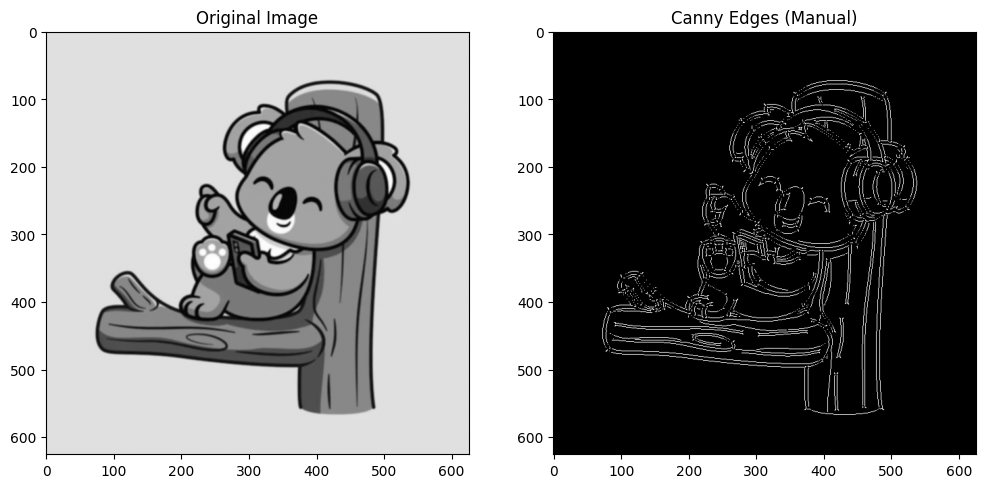

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Computing gradients using Sobel
Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

# Computing gradient magnitude and direction
magnitude = np.hypot(Gx, Gy)
magnitude = magnitude / magnitude.max() * 255  # Normalize to 0-255
theta = np.arctan2(Gy, Gx)

# Non-Maximum Suppression
def non_maximum_suppression(magnitude, theta):
    M, N = magnitude.shape
    output = np.zeros((M,N), dtype=np.uint8)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255

            # 0°
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            # 45°
            elif (22.5 <= angle[i,j] < 67.5):
                q = magnitude[i-1, j+1]
                r = magnitude[i+1, j-1]
            # 90°
            elif (67.5 <= angle[i,j] < 112.5):
                q = magnitude[i-1, j]
                r = magnitude[i+1, j]
            # 135°
            elif (112.5 <= angle[i,j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                output[i,j] = magnitude[i,j]
            else:
                output[i,j] = 0

    return output

nms = non_maximum_suppression(magnitude, theta)

# Double Thresholding
def double_threshold(img, lowThreshold, highThreshold):
    weak = 75
    strong = 255

    strong_i, strong_j = np.where(img >= highThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res = np.zeros_like(img, dtype=np.uint8)
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return res, weak, strong

thresholded, weak, strong = double_threshold(nms, 5, 10)

# Edge Tracking by Hysteresis
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i,j] == weak:
                if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                    or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                    or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                    img[i,j] = strong
                else:
                    img[i,j] = 0
    return img

final_edges = hysteresis(thresholded, weak)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(blurred, cmap='gray')

plt.subplot(1,2,2)
plt.title("Canny Edges (Manual)")
plt.imshow(final_edges, cmap='gray')

plt.show()